https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [213]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('../data/sales/shampoo.csv')
series.drop(36, inplace=True)
series.columns = ['Month','sales']

In [214]:
series.index=pd.to_datetime(series.Month.apply(lambda val: str(2011+int(val[0]))+'-'+ val[2:4]))
series = series.drop('Month',axis=1);

            sales
Month            
2012-01-01  266.0
2012-02-01  145.9
2012-03-01  183.1
2012-04-01  119.3
2012-05-01  180.3


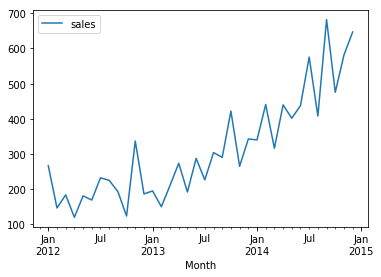

In [215]:
print(series.head())
series.plot()
pyplot.show()

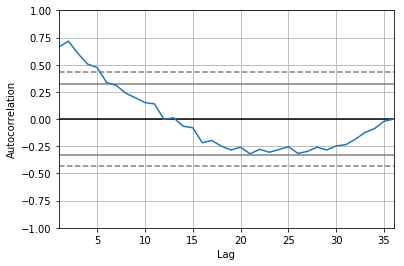

In [216]:
autocorrelation_plot(series)
plt.show()

In [222]:
series.index

DatetimeIndex(['2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [223]:
series.index = pd.DatetimeIndex(series.index.values,
                               freq=series.index.inferred_freq)

/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensiona

                             ARIMA Model Results                              
Dep. Variable:                D.sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 29 Sep 2018   AIC                            406.340
Time:                        15:18:31   BIC                            417.227
Sample:                    02-01-2012   HQIC                           410.098
                         - 12-01-2014                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.sales    -0.6203      0.282     

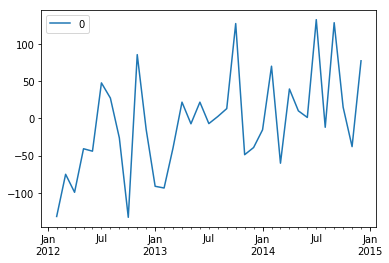

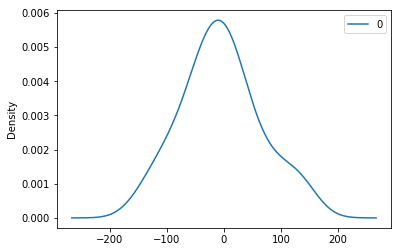

                0
count   35.000000
mean    -5.495279
std     68.132878
min   -133.296671
25%    -42.477991
50%     -7.186660
75%     24.748276
max    133.237902


In [224]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [231]:
test

array([[342.3],
       [339.7],
       [440.4],
       [315.9],
       [439.3],
       [401.3],
       [437.4],
       [575.5],
       [407.6],
       [682. ],
       [475.3],
       [581.3],
       [646.9]])

/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/ryan/.local/share/virtualenvs/thinkful-Xo17phXs/lib/python3.7/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensiona

predicted=349.117642, expected=342.300000
predicted=306.512938, expected=339.700000
predicted=387.376368, expected=440.400000
predicted=348.154147, expected=315.900000
predicted=386.308818, expected=439.300000
predicted=356.081976, expected=401.300000
predicted=446.379472, expected=437.400000
predicted=394.737238, expected=575.500000
predicted=434.915512, expected=407.600000
predicted=507.923463, expected=682.000000
predicted=435.483015, expected=475.300000
predicted=652.743777, expected=581.300000
predicted=546.343476, expected=646.900000
Test MSE: 6958.326


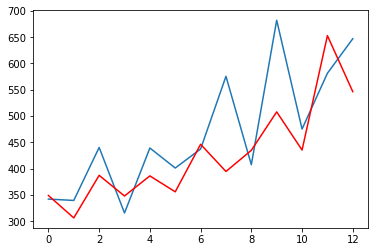

In [228]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [233]:
rmse(test,predictions)

NameError: name 'rmse' is not defined